# 🏡 Housing Price Prediction using Regression

This project aims to predict housing prices based on features such as average area income, house age, number of rooms, number of bedrooms, and population.

---

## 📌 Objective
To explore and implement:
- Basic exploratory data analysis (EDA)
- Feature engineering (`Rooms/Bedrooms` ratio)
- Data preprocessing using **SimpleImputer**
- Model training with:
  - `LinearRegression`

## ✅ Model Performance (Linear Regression)
- **R² Score:** `0.89`  
- This means ~89% of the variance in housing prices is explained by the model.

---

## 🔧 Libraries Used
- `pandas`, `numpy`
- `sklearn` (`LinearRegression`, `RandomForestRegressor`, `train_test_split`, `SimpleImputer`)
- `matplotlib` / `seaborn`


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [105]:
data=pd.read_csv("housing.csv")
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [107]:
data.dropna(inplace=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [111]:
from sklearn.model_selection import train_test_split

X=data.drop(['Price','Address'],axis=1)
y=data['Price']


In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [115]:
train_data=X_train.join(y_train)
train_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
3843,70885.51170,7.489075,5.401579,4.13,39730.15754,1.246595e+06
428,97112.36125,5.914725,6.133646,3.10,51470.06764,1.917584e+06
4445,70594.15766,6.727456,6.844712,2.04,55601.04894,1.673538e+06
2774,68368.40084,6.214134,7.298147,5.31,28438.89283,1.156308e+06
2939,87541.45288,6.570194,6.399107,3.22,31044.97947,1.603046e+06
...,...,...,...,...,...,...
3937,49664.26757,4.501302,5.737676,3.35,29403.51206,5.811350e+05
853,74633.94170,5.745854,5.627388,3.40,30600.60461,1.056977e+06
2862,62209.87231,6.162330,7.989807,4.27,32529.95072,1.104109e+06
1560,77316.19135,4.128267,5.715441,2.36,51096.88855,1.243982e+06


array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

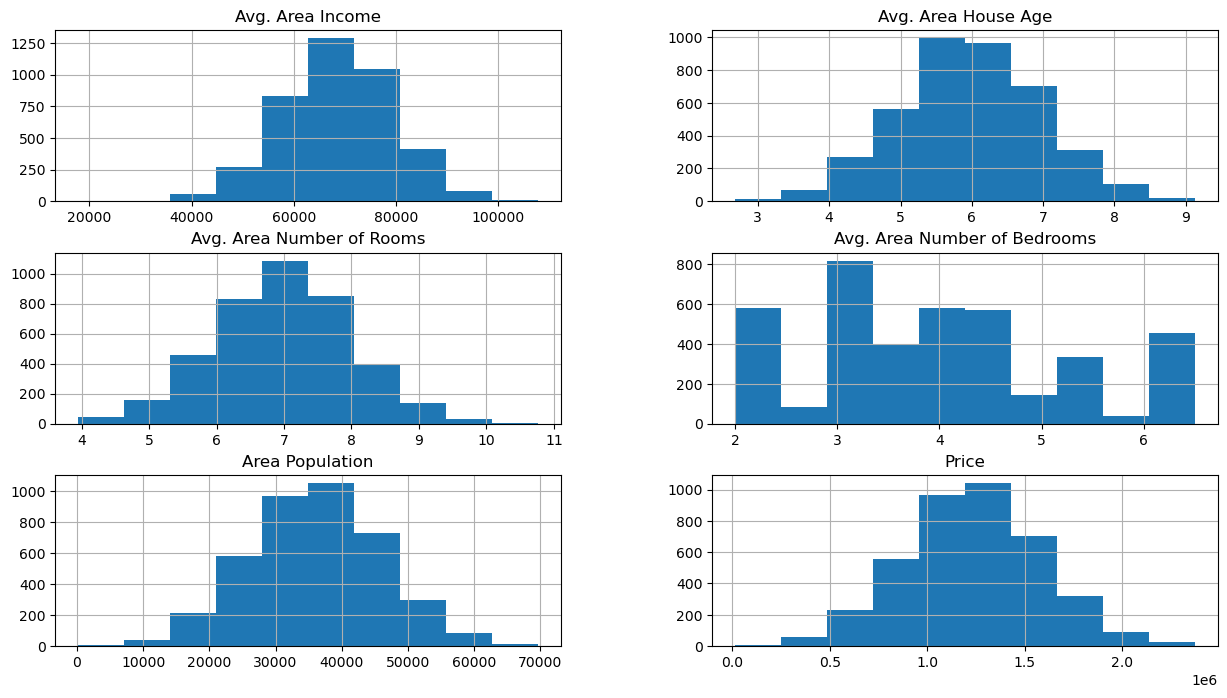

In [117]:
train_data.hist(figsize=(15,8))

In [119]:
train_data['Avg. Area Income']=np.log(train_data['Avg. Area Income']+1)
train_data['Avg. Area House Age']=np.log(train_data['Avg. Area House Age']+1)
train_data['Avg. Area Number of Rooms']=np.log(train_data['Avg. Area Number of Rooms']+1)
train_data['Area Population']=np.log(train_data['Area Population']+1)
train_data['Avg. Area Number of Bedrooms']=np.log(train_data['Avg. Area Number of Bedrooms']+1)

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

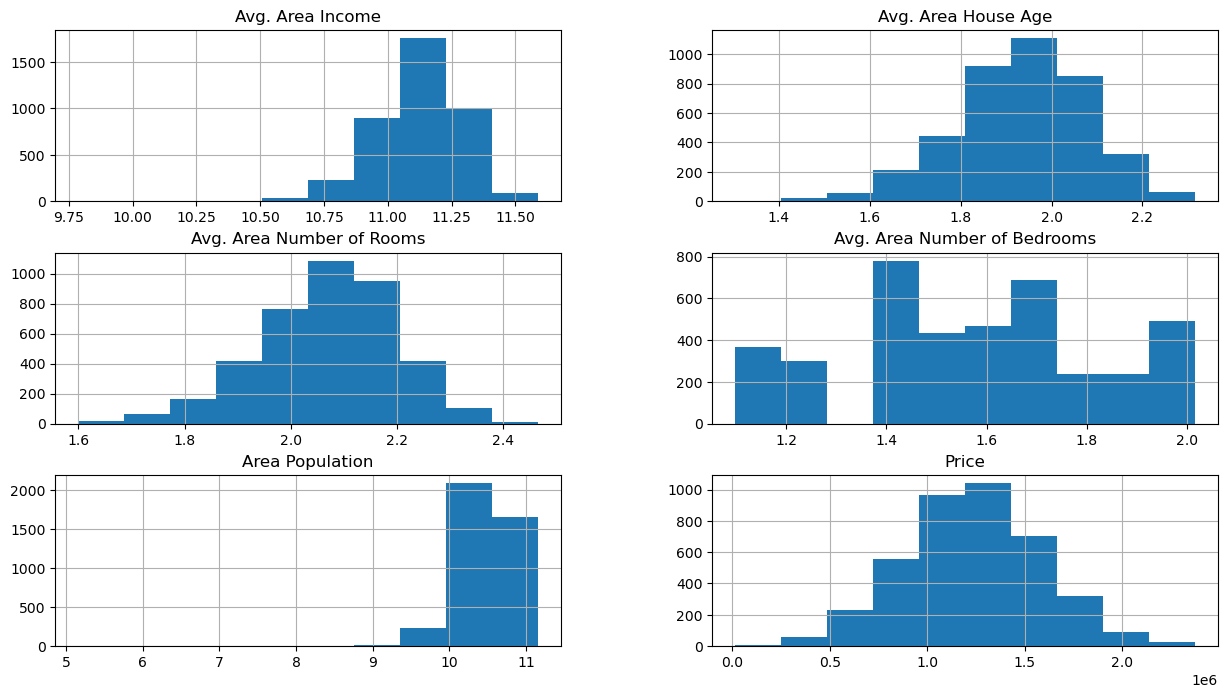

In [121]:
train_data.hist(figsize=(15,8))

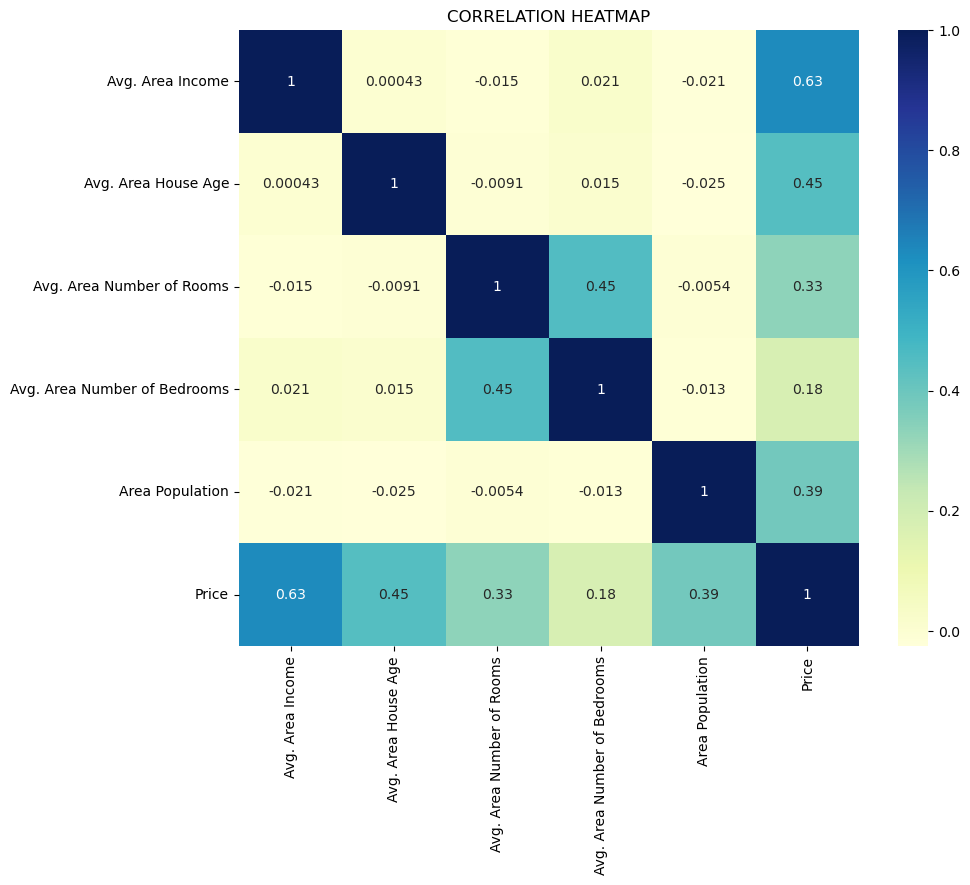

In [123]:
corr_matrix=train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.title("CORRELATION HEATMAP")
plt.show()

In [125]:
train_data['Rooms_Bedrooms_Ratio']= train_data['Avg. Area Number of Rooms']/(train_data['Avg. Area Number of Bedrooms'] + 1e-5)

In [133]:
train_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Rooms_Bedrooms_Ratio
3843,11.168835,2.138780,1.856545,1.635106,10.589891,1.246595e+06,0.758664
428,11.483634,1.933653,1.964822,1.410987,10.848775,1.917584e+06,0.872342
4445,11.164717,2.044780,2.059840,1.111858,10.925975,1.673538e+06,1.048229
2774,11.132681,1.976042,2.116032,1.842136,10.255548,1.156308e+06,0.764853
2939,11.379879,2.024219,2.001359,1.439835,10.343225,1.603046e+06,0.871286
...,...,...,...,...,...,...,...
3937,10.813061,1.704985,1.907715,1.470176,10.288903,5.811350e+05,0.831866
853,11.220364,1.908928,1.891211,1.481605,10.328808,1.056977e+06,0.822618
2862,11.038285,1.968835,2.196091,1.662030,10.389947,1.104109e+06,0.842137
1560,11.255672,1.634768,1.904410,1.211941,10.841498,1.243982e+06,0.944434


In [135]:
train_data['Rooms_Bedrooms_Ratio']=np.log(train_data['Rooms_Bedrooms_Ratio']+1)

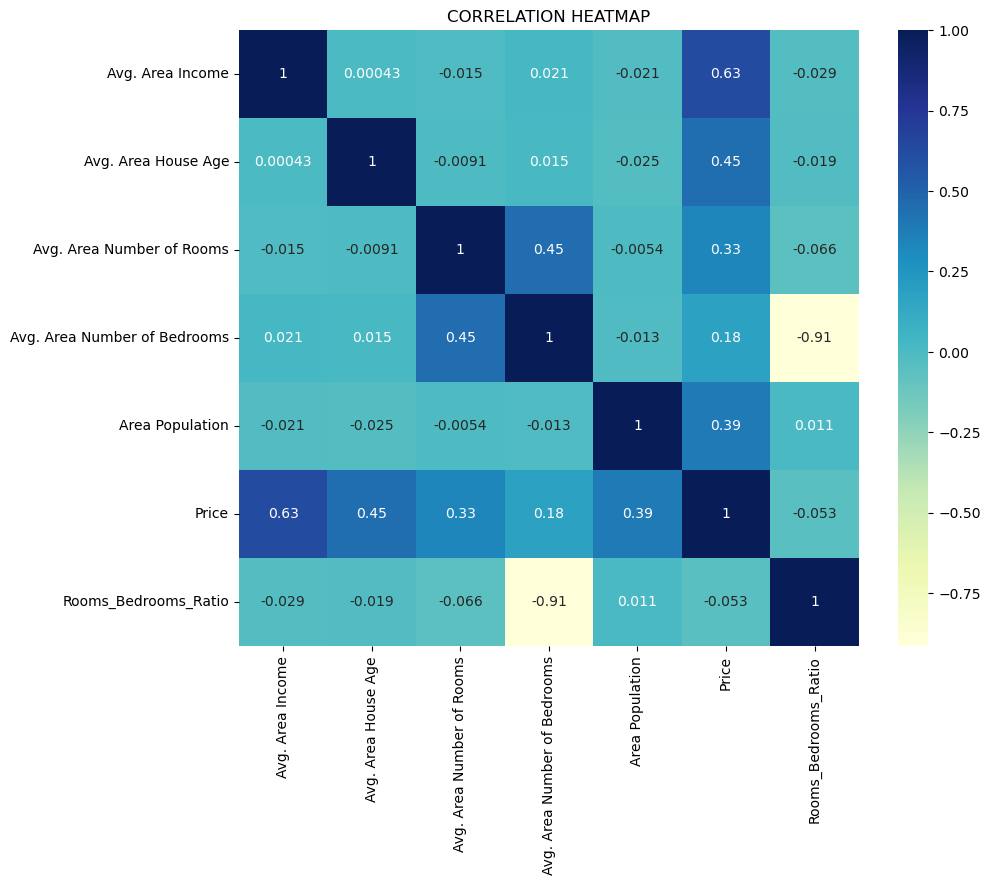

In [137]:
corr_matrix=train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.title("CORRELATION HEATMAP")
plt.show()

In [139]:
from sklearn.linear_model import LinearRegression
col_to_drop=[col for col in ['Address'] if col in train_data.columns]
X_train=train_data.drop(columns=col_to_drop+['Price'])
y_train= train_data['Price']
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [141]:
test_data=X_test.join(y_test)

test_data['Avg. Area Income']=np.log(test_data['Avg. Area Income']+1)
test_data['Avg. Area House Age']=np.log(test_data['Avg. Area House Age']+1)
test_data['Avg. Area Number of Rooms']=np.log(test_data['Avg. Area Number of Rooms']+1)
test_data['Area Population']=np.log(test_data['Area Population']+1)
test_data['Avg. Area Number of Bedrooms']=np.log(test_data['Avg. Area Number of Bedrooms']+1)

test_data['Rooms_Bedrooms_Ratio']= test_data['Avg. Area Number of Rooms']/(train_data['Avg. Area Number of Bedrooms'] + 1e-5)
test_data['Rooms_Bedrooms_Ratio']=np.log(test_data['Rooms_Bedrooms_Ratio']+1)

col_to_drop=[col for col in ['Address'] if col in test_data.columns]
X_test=test_data.drop(columns=col_to_drop+['Price'])
y_test=test_data['Price']

In [147]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X_train_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.transform(X_test)

In [151]:
reg.fit(X_train_imputed,y_train)
print("R^2 Score:",reg.score(X_test_imputed,y_test))

R^2 Score: 0.8992039835385659
